## Relationship between Pollution Proximity Index and Minorties

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

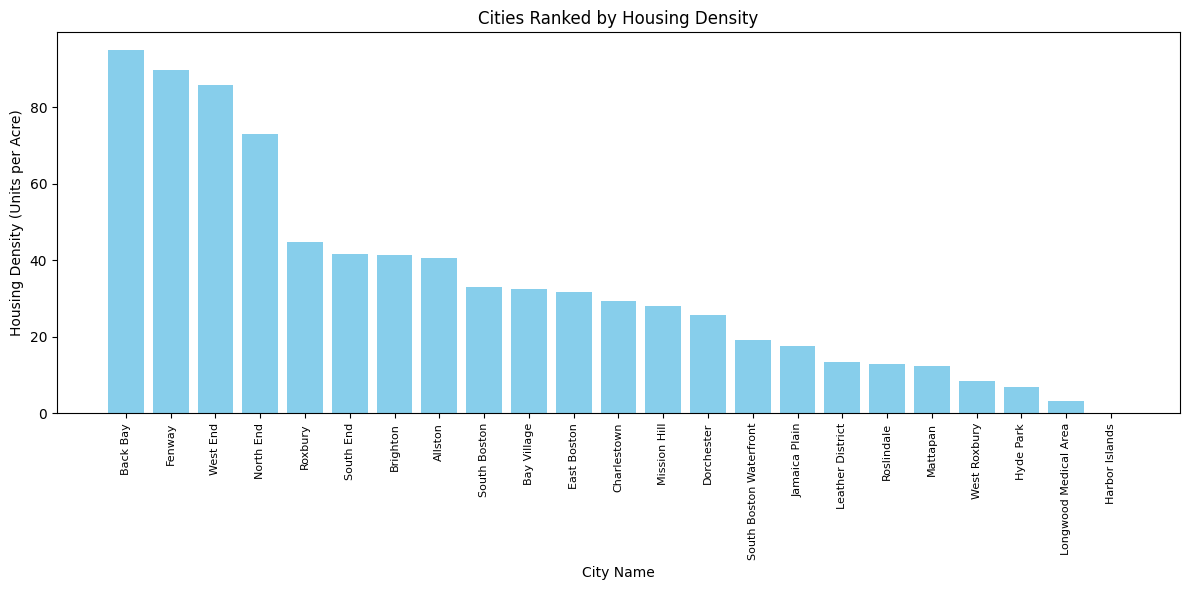

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = "../data/boston_dem.csv"
data = pd.read_csv(file_path)

data['Housing Density'] = data['HU100_RE'] / data['AREA_ACRES']

data_sorted = data.sort_values(by='Housing Density', ascending=False)

# Create the bar chart for all cities
plt.figure(figsize=(12, 6))
plt.bar(data_sorted['Name'], data_sorted['Housing Density'], color='skyblue')
plt.xlabel('City Name')
plt.ylabel('Housing Density (Units per Acre)')
plt.title('Cities Ranked by Housing Density')
plt.xticks(rotation=90, fontsize=8)

plt.tight_layout()
plt.show()


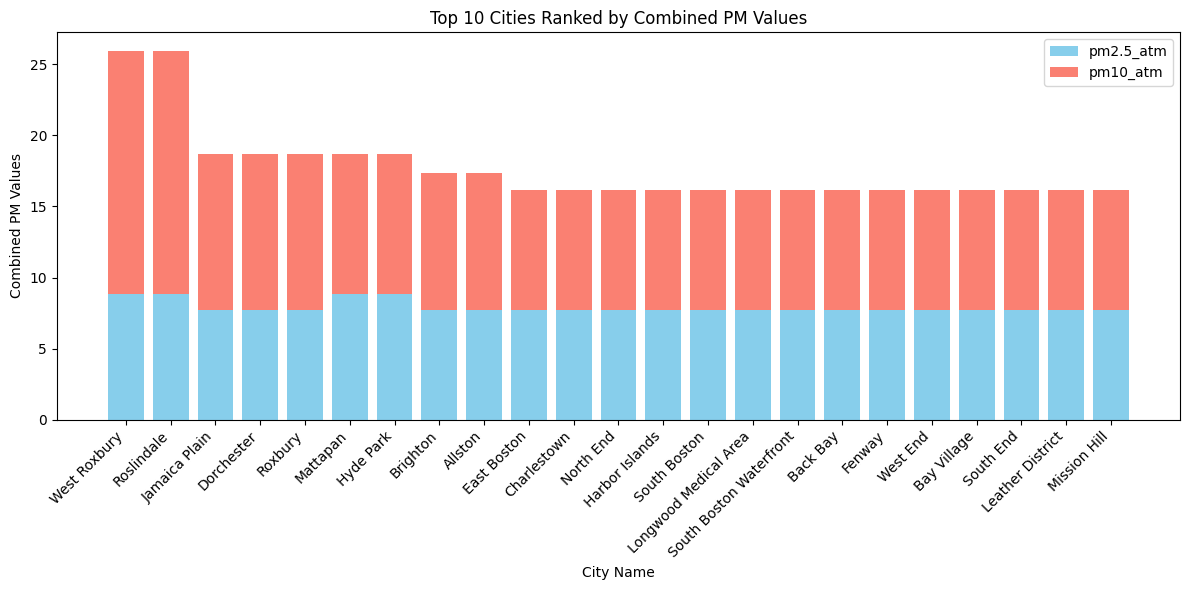

In [52]:
import matplotlib.pyplot as plt

data['Combined_PM'] = data['pm2.5_atm'] + data['pm10_atm']
data_sorted = data.sort_values(by='Combined_PM', ascending=False)

# Create the stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(data_sorted['Name'], data_sorted['pm2.5_atm'], label='pm2.5_atm', color='skyblue')
plt.bar(data_sorted['Name'], data_sorted['pm10_atm'], bottom=data_sorted['pm2.5_atm'], label='pm10_atm', color='salmon')
plt.xlabel('City Name')
plt.ylabel('Combined PM Values')
plt.title('Top 10 Cities Ranked by Combined PM Values')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1200x800 with 0 Axes>

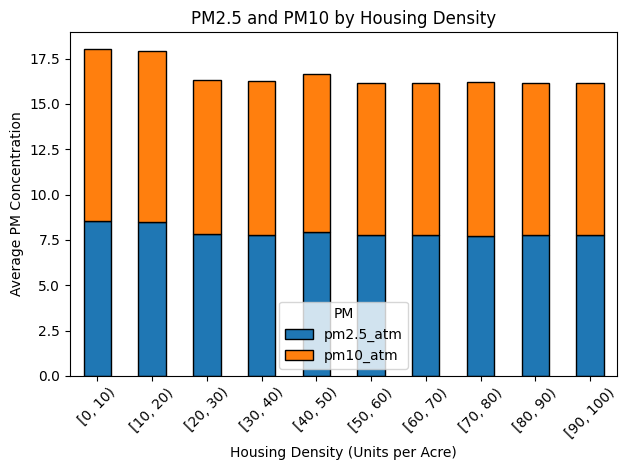

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate combined PM (pm2.5_atm + pm10_atm)
data['Combined_PM'] = data['pm2.5_atm'] + data['pm10_atm']

# Define the bin edges for housing density
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Adjust the bin edges as needed

data['Housing Density Bin'] = pd.cut(data['Housing Density'], bins=bin_edges, right=False)

grouped_data = data.groupby('Housing Density Bin')[['pm2.5_atm', 'pm10_atm']].mean()

# Plot the data as a stacked bar chart
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', stacked=True, edgecolor='black')
plt.title('PM2.5 and PM10 by Housing Density')
plt.xlabel('Housing Density (Units per Acre)')
plt.ylabel('Average PM Concentration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='PM', labels=['pm2.5_atm', 'pm10_atm'])
plt.show()


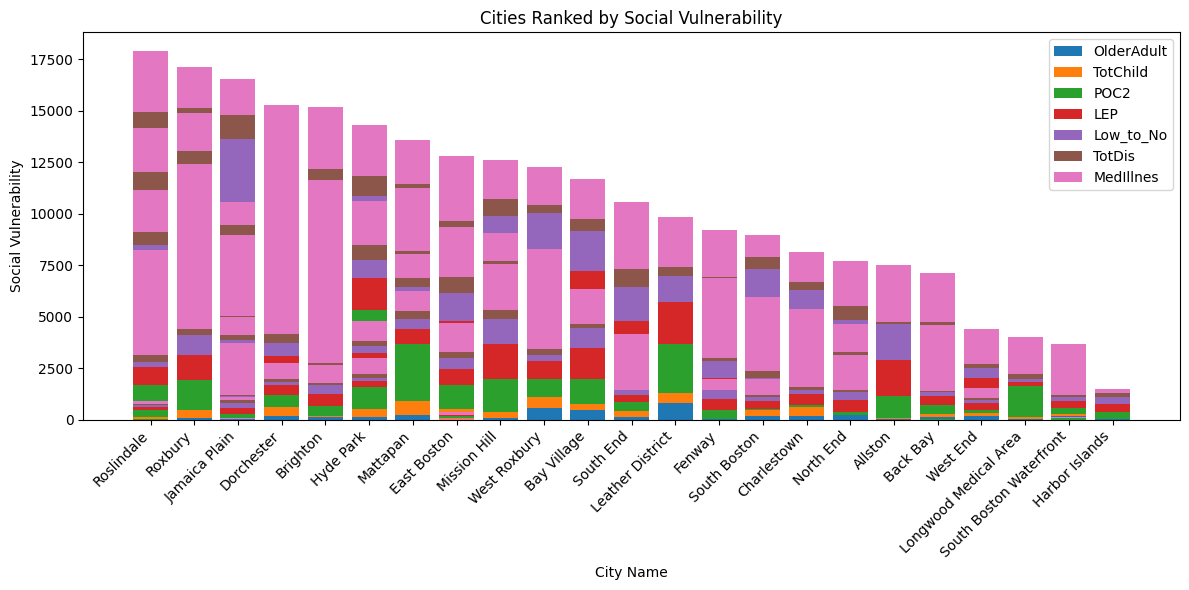

In [54]:
import matplotlib.pyplot as plt

# Define your social vulnerability categories (e.g., 'OlderAdult', 'TotChild', 'POC2', 'LEP', 'Low_to_No', 'TotDis', 'MedIllnes')
vulnerability_categories = ['OlderAdult', 'TotChild', 'POC2', 'LEP', 'Low_to_No', 'TotDis', 'MedIllnes']

# Rank cities by social vulnerability
data['Total_Social_Vulnerability'] = data[vulnerability_categories].sum(axis=1)
data_sorted = data.sort_values(by='Total_Social_Vulnerability', ascending=False)

# Create the stacked bar chart
plt.figure(figsize=(12, 6))

bottom = None
for category in vulnerability_categories:
    plt.bar(data_sorted['Name'], data_sorted[category], label=category, bottom=bottom)
    if bottom is None:
        bottom = data_sorted[category]
    else:
        bottom += data_sorted[category]

plt.xlabel('City Name')
plt.ylabel('Social Vulnerability')
plt.title('Cities Ranked by Social Vulnerability')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()
